<h1 style = 'color: Orange; text-align:center; font-weight: bold'>Feature Extraction and Selection </h1>

<p style = 'text-align:center'>In this final file we will try to reduce the dimesions or create new meaningful features for our data</p>

In [1]:
## Loading df and all_df dataframes
import pandas as pd
import pickle
import Functions as f 
old_df = pd.read_pickle('PickleCleaning.pkl')   ## for making decisions
df = pd.read_pickle('model_with_all_features.pkl')  ## Original dataset
print(df.shape)
print(old_df.shape)

(2908, 187)
(2908, 80)


In [2]:
df

,LotFrontage,LotArea,Alley,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,__Heating_Wall,__GarageType_Attchd,__GarageType_Basment,__GarageType_BuiltIn,__GarageType_Detchd,__GarageType_No Garage,__GarageType_Other,__MiscFeature_None,__MiscFeature_Other,__MiscFeature_Shed
0,4.189655,9.042040,0,7,5,5.283204,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.394449,9.169623,0,6,8,0.000000,3,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.234107,9.328212,0,7,5,5.093750,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.110874,9.164401,0,7,5,0.000000,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4.442651,9.565284,0,8,5,5.860786,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,4.454347,8.976894,0,4,7,4.787492,3,3,4,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2904,4.204693,9.486152,0,4,5,0.000000,3,3,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2905,4.234107,9.109746,0,5,7,0.000000,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2906,4.330733,9.181735,0,5,5,0.000000,3,3,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
[col for col in df.columns if "Garage" in col]

['GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 '__GarageType_Attchd',
 '__GarageType_Basment',
 '__GarageType_BuiltIn',
 '__GarageType_Detchd',
 '__GarageType_No Garage',
 '__GarageType_Other']

With <code>old_df</code> i will analyze which columns should be delete or modify and in <code>df</code> will apply the changes

first let's analyze Exterior Columns since that the only column i remeber that can be reduced

In [4]:
old_df[['Exterior1st', 'Exterior2nd']]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
...,...,...
1454,CemntBd,CmentBd
1455,CemntBd,CmentBd
1456,VinylSd,VinylSd
1457,HdBoard,Wd Shng


In [5]:
old_df['Exterior1st'].reset_index()

,index,Exterior1st
0,0,VinylSd
1,1,MetalSd
2,2,VinylSd
3,3,Wd Sdng
4,4,VinylSd
...,...,...
2903,1454,CemntBd
2904,1455,CemntBd
2905,1456,VinylSd
2906,1457,HdBoard


In this column i found a pattern that can be see by below code

In [6]:
old_df.reset_index(drop=True, inplace=True)


In [7]:
Exteriors_df = pd.crosstab(old_df['Exterior1st'], old_df['Exterior2nd'])
Exteriors_df

Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,35,0,0,0,0,1,0,0,0,0,5,0,1,0,1,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,4,0,0,0,0,0,0,0,0,0,1,0,1,0
BrkFace,1,0,0,43,0,0,3,0,3,0,8,3,3,1,20,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
CemntBd,0,0,0,0,0,124,0,0,0,0,0,0,0,0,1,1
HdBoard,0,1,0,1,0,0,383,6,1,0,41,0,1,0,3,5
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,3,0,437,0,0,0,3,2,2,1


Here the pattern can be notice is that each unique value of Exterior's is intercepting mostly with it's column that makes present of both colmn near to unsesable (sorry for english) that can be visualzize a differnt way also

<Axes: xlabel='Exterior2nd', ylabel='Exterior2nd'>

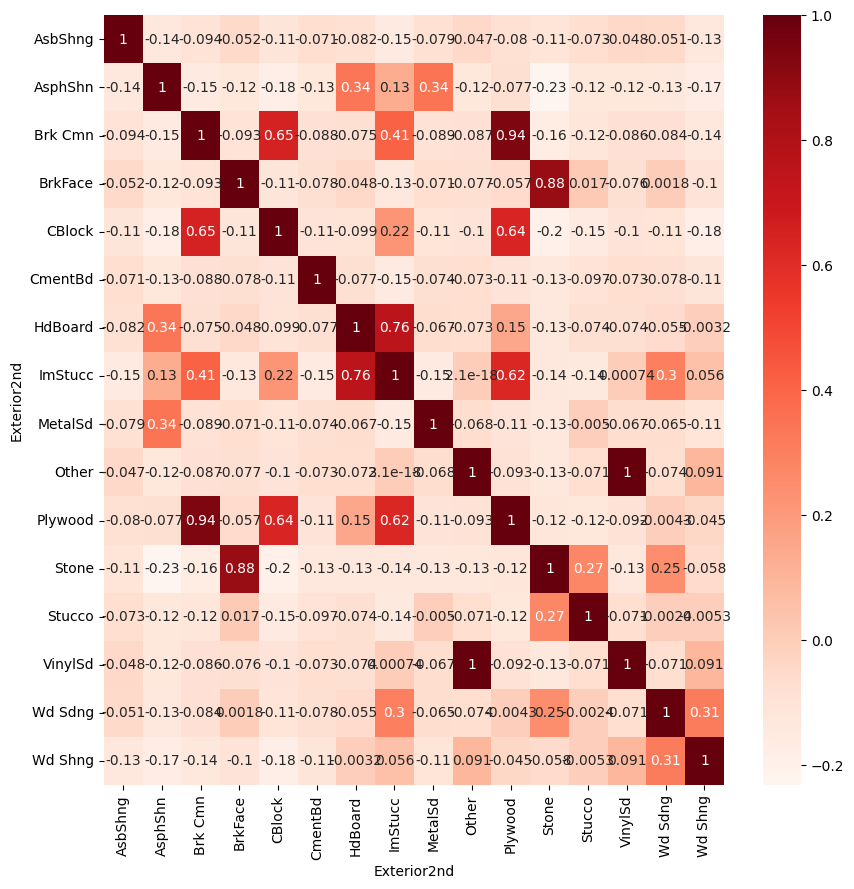

In [8]:
## plotting correlation matrix for that
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 10))
sns.heatmap(Exteriors_df.corr(), annot = True, cmap = 'Reds')

In [9]:
df.shape

(2908, 187)

Here is the corelation matrix that shows that Exterior 1st and Exterior 2nd are almost representing same data so Exterior1st , Exterior2nd can be selected as a single column <code>Exteriors</code>

In [10]:
print(f.find_columns(df,['Exterior1st', 'Exterior2nd']))
df.drop(f.find_columns(df,['Exterior1st', 'Exterior2nd']), axis = 1, inplace = True)
df.shape


['__Exterior1st_BrkFace', '__Exterior1st_CemntBd', '__Exterior1st_HdBoard', '__Exterior1st_MetalSd', '__Exterior1st_Other', '__Exterior1st_Plywood', '__Exterior1st_VinylSd', '__Exterior1st_Wd Sdng', '__Exterior1st_WdShing', '__Exterior2nd_CmentBd', '__Exterior2nd_HdBoard', '__Exterior2nd_MetalSd', '__Exterior2nd_Other', '__Exterior2nd_Plywood', '__Exterior2nd_VinylSd', '__Exterior2nd_Wd Sdng', '__Exterior2nd_Wd Shng']


(2908, 170)

In [11]:
## Adding Exterior column
df['Exterior'] = old_df['Exterior1st']
print(df['Exterior'].value_counts())
df.shape

Exterior
VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     407
Plywood     219
CemntBd     126
BrkFace      86
WdShing      56
AsbShng      43
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64


(2908, 171)

Introductin others for this where it's less than 50

In [12]:
## importing function file for using the other file
f.introduce_other(df, 'Exterior', 50)
print(df['Exterior'].value_counts())

Exterior
VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     407
Plywood     219
CemntBd     126
Other        99
BrkFace      86
WdShing      56
Name: count, dtype: int64


In [13]:
f.find_columns(df, ['Exterio'])

['Exterior']

In [14]:
## applying OHE on this column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
encoded_exterior = encoder.fit_transform(df[['Exterior']])
encoded_exterior_df = pd.DataFrame(encoded_exterior, columns= encoder.get_feature_names_out())

## appending this df to main df
df = pd.concat([df, encoded_exterior_df ], axis = 1)
df.drop('Exterior', axis = 1, inplace = True)
df.shape

(2908, 179)

Checking Garage columns since they may very corelated

In [15]:
garage_cols = [col for col in old_df.columns if "Garage" in col]
old_df[garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2903,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
2904,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2905,Detchd,1960.0,Unf,2.0,576.0,TA,TA
2906,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage


In [16]:
## Let's first create a crosstab for GarageQual and GarageCond to see the relation
pd.crosstab(old_df['GarageQual'], old_df['GarageCond'])

GarageCond,Ex,Fa,Gd,No Garage,Po,TA
GarageQual,,,,,,
Ex,2,0,0,0,0,1
Fa,0,38,0,0,7,77
Gd,1,0,6,0,0,17
No Garage,0,0,0,157,0,0
Po,0,1,0,0,4,0
TA,0,33,9,0,2,2553


From above metrix it is very much clear that i can remove any one of the Feature. So am removing Garage Cond because that does'nt make very importing sound

In [17]:
print(df.shape)
df.drop('GarageCond', axis = 1, inplace = True)
df.shape

(2908, 179)


(2908, 178)

Now if we look then <code>GarageCars</code> is like a gimmy column when we have <code>GarageArea</code> then why do we need how many cars can fit into that. So removing GarageCars column too.

In [18]:
df.drop('GarageCars', axis = 1, inplace = True)
df.shape

(2908, 177)

For GarageType, GarageYrBuilt, GarageFinish i will create a new column based on condition<br>
<li><code>Modern Finished Garage:</code> Built after 2000 and has a Fin finish.</li>
<li><code>Modern Unfinished Garage:</code>  Built after 2000 but has Unf or RFn finish.</li>
<li><code>Old Finished Garage:</code>  Built before 2000 with a Fin finish.</li>
<li><code>Old Unfinished Garage:</code>  Built before 2000 with Unf or RFn finish.</li>
<li><code>No Garage.</code> <br>
after that will train data with new category and the old one and will see which is performing better

In [19]:
old_df[f.find_columns(old_df, ['Garage'])]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2903,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
2904,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2905,Detchd,1960.0,Unf,2.0,576.0,TA,TA
2906,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage


In [20]:
# Define a function to categorize garages
def categorize_garage(row):
    if row['GarageType'] == 'No Garage':
        return 'No Garage'
    elif row['GarageYrBlt'] > 2000:
        if row['GarageFinish'] == 'Fin':
            return 'Modern Finished Garage'
        elif row['GarageFinish'] in ['Unf', 'RFn']:
            return 'Modern Unfinished Garage'
    elif row['GarageYrBlt'] <= 2000:
        if row['GarageFinish'] == 'Fin':
            return 'Old Finished Garage'
        elif row['GarageFinish'] in ['Unf', 'RFn']:
            return 'Old Unfinished Garage'
    return 'Unknown'  # Fallback for unexpected cases

# Apply the function to create the new column
df['GarageRating'] = old_df.apply(categorize_garage, axis=1)

In [21]:
df['GarageRating']

0       Modern Unfinished Garage
1          Old Unfinished Garage
2       Modern Unfinished Garage
3          Old Unfinished Garage
4          Old Unfinished Garage
                  ...           
2903                   No Garage
2904       Old Unfinished Garage
2905       Old Unfinished Garage
2906                   No Garage
2907         Old Finished Garage
Name: GarageRating, Length: 2908, dtype: object

In [22]:
## Now adding Label Encoding For GarageRating Column
df['GarageRating'] = df['GarageRating'].map(
    {
        'Modern Finished Garage': 4,
        'Modern Unfinished Garage': 3,
        'Old Finished Garage': 2,
        'Old Unfinished Garage': 1,
        'No Garage': 0,
        'Unknown': 0
    }
)

df['GarageRating'].value_counts()

GarageRating
1    1651
3     382
4     370
2     348
0     157
Name: count, dtype: int64

In [23]:
f.find_columns(df, ['GarageType', 'GarageYrBlt', 'GarageFinish'])

['GarageYrBlt',
 'GarageFinish',
 '__GarageType_Attchd',
 '__GarageType_Basment',
 '__GarageType_BuiltIn',
 '__GarageType_Detchd',
 '__GarageType_No Garage',
 '__GarageType_Other']

Now creating two dataFram one with Garage columns one with only GarageRating column

In [24]:
Garage_rating_df = df.drop(f.find_columns(df, ['GarageType', 'GarageYrBlt', 'GarageFinish']), axis = 1)  ## contains GarageRating only
No_Garage_rating_df = df.drop('GarageRating', axis = 1) ## Does not contain GarageRating

In [25]:
Garage_rating_df.shape

(2908, 170)

In [26]:
No_Garage_rating_df.shape

(2908, 177)

In [27]:
# Adding SalePrice into my main data for further splitting process
df['SalePrice'] = old_df['SalePrice']

In [28]:
## creating function for scaling
from sklearn.preprocessing import StandardScaler
def scaling_data(X_train, X_test):
    ss = StandardScaler()
    x_train_scaled = ss.fit_transform(X_train)
    x_test_scaled = ss.transform(X_test)
    x_train = pd.DataFrame(x_train_scaled , columns= X_train.columns)
    x_test = pd.DataFrame(x_test_scaled , columns = X_test.columns)
    return x_train , x_test

In [29]:
## training the data and get accuracy
## Importing Models to check for accuracy
# Import popular regression models
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}



# Evaluation metrics for regression
from sklearn.metrics import root_mean_squared_error as rmse, r2_score
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_models(df, models):
    ## Splitting traintest data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis = 1), df.SalePrice, random_state = 42)
    X , Y = df.drop('SalePrice', axis = 1), df.SalePrice   ## for cross val chcekcin

    ## scaling the X data
    X_scaled = StandardScaler().fit_transform(X)
    X = pd.DataFrame(X_scaled, columns= X.columns)

    ## scaling train test data
    ss2 = StandardScaler()
    X_train_scaled = ss2.fit_transform(X_train)
    X_test_scaled = ss2.transform(X_test)
    X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
    X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

    ## dic for storing result
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        ## doing cross validation
        cv_score = np.mean(cross_val_score(model, X , Y, cv = 5))
        
        # Calculate metrics
        rmse_train = rmse(y_train, y_pred_train)
        rmse_test = rmse(y_test, y_pred_test)
        R2_train = r2_score(y_train, y_pred_train)
        R2_test = r2_score(y_test, y_pred_test)
        
        results[name] = {
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'R2_train' : R2_train,
            'R2_test': R2_test,
            'cross_val_score': cv_score
        }
    print(X.shape)
    
    return pd.DataFrame(results).T

# Evaluate all models for with Garage column
results = evaluate_models(Garage_rating_df , models)
results


(2908, 169)


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37347.393341,39628.733234,0.780753,0.726455,-7.946813e+23
Decision Tree,0.000000,31061.815305,1.000000,0.831941,9.351920e-01
Random Forest,8500.653065,22455.575340,0.988642,0.912167,9.399662e-01
Gradient Boosting,19019.779491,24958.507336,0.943138,0.891496,9.071196e-01


Accuracy With All Features For Comparision<br>
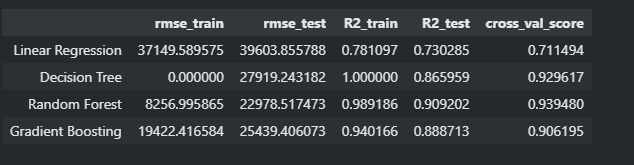

In [30]:
# evaluate_models(No_Garage_rating_df , models)

If we compare then it shows that accuracy is quite neglible in both the dataseset so choosing the data with less feature means <code>df with GarageRating feature </code>

In [31]:
df = Garage_rating_df
df.shape

(2908, 170)

In [32]:
df[f.find_columns(df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,4,3,1,6,6.561031,1,0.000000,5.017280,6.753438,1.0,0.0
1,4,3,4,5,6.886532,1,0.000000,5.652489,7.141245,0.0,1.0
2,4,3,2,6,6.188264,1,0.000000,6.075346,6.825460,1.0,0.0
3,3,4,1,5,5.379897,1,0.000000,6.293419,6.629363,1.0,0.0
4,4,3,3,6,6.486161,1,0.000000,6.196444,7.044033,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2903,4,3,1,1,0.000000,1,0.000000,6.860664,6.860664,0.0,0.0
2904,4,3,1,5,6.673298,3,5.099866,6.380123,7.341484,0.0,0.0
2905,3,4,1,6,5.620401,1,0.000000,6.777647,7.050123,1.0,0.0
2906,3,3,2,6,3.912023,3,6.937314,0.000000,6.983790,0.0,1.0


In [33]:
## checking Bsmt Features
old_df[f.find_columns(old_df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
3,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
4,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2903,Gd,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,0.0,0.0
2904,Gd,TA,No,ALQ,252.0,Rec,0.0,294.0,546.0,0.0,0.0
2905,TA,Gd,No,GLQ,1224.0,Unf,0.0,0.0,1224.0,1.0,0.0
2906,TA,TA,Mn,GLQ,337.0,Rec,0.0,575.0,912.0,0.0,1.0


clearly we can see TotalBsmtSf is nothing but BsmtFinSF1 + BsmtFinSF2+ BsmtUnfSF so removing these 2 columns and consider TotalBsmtSF only

In [34]:
test_df = df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1)

In [35]:
test_df[f.find_columns(test_df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,4,3,1,6,1,6.753438,1.0,0.0
1,4,3,4,5,1,7.141245,0.0,1.0
2,4,3,2,6,1,6.825460,1.0,0.0
3,3,4,1,5,1,6.629363,1.0,0.0
4,4,3,3,6,1,7.044033,1.0,0.0
...,...,...,...,...,...,...,...,...
2903,4,3,1,1,1,6.860664,0.0,0.0
2904,4,3,1,5,3,7.341484,0.0,0.0
2905,3,4,1,6,1,7.050123,1.0,0.0
2906,3,3,2,6,3,6.983790,0.0,1.0


Now here BsmtFinSF1, BsmtUnSF and BsmtFinSF2 are removed.

Let's again check how it effect the accuracy

In [36]:
evaluate_models(test_df, models)

(2908, 166)


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37425.273829,39503.945721,0.779838,0.728175,-7.322322e+24
Decision Tree,0.000000,31810.271461,1.000000,0.823744,9.248525e-01
Random Forest,8857.038474,23480.016633,0.987669,0.903970,9.342599e-01
Gradient Boosting,19818.149082,25123.381647,0.938264,0.890058,9.039607e-01


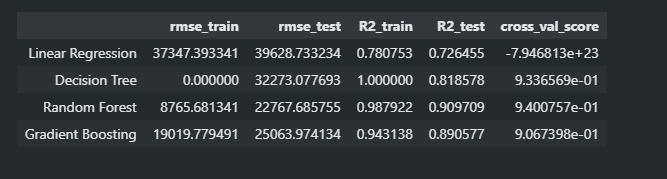

It's look our model internally has found any relation with Target Column for these features that's why the Accuracy has decreased.But let this time delete TotalBsmtSf and check Accuracy

In [37]:
test_df = df.drop('TotalBsmtSF', axis = 1)
evaluate_models(test_df, models)

(2908, 168)


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37805.659992,40025.603452,0.775340,0.720949,-3.594180e+23
Decision Tree,0.000000,25847.524720,1.000000,0.883629,9.306827e-01
Random Forest,9212.543203,22915.064699,0.986660,0.908536,9.394849e-01
Gradient Boosting,19717.167073,25732.106352,0.938891,0.884666,9.055767e-01


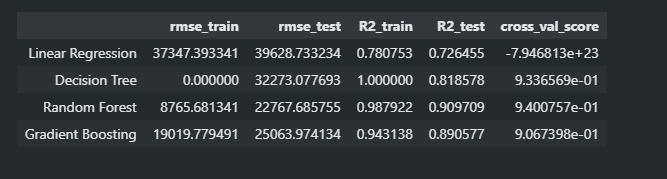

Since accuracy is decreased so better will not remove these features let they be how they are

In [38]:
df['BsmtFinSF2'].corr(df.SalePrice)

-0.04737502824086848

since BsmtFinSF2 is not releated with SalePrice so let's delete this and test the accuracy

In [39]:
test_df = df.drop('BsmtFinSF2', axis = 1)
# evaluate_models(test_df, models)a

It's Not working .... have to think something else

Let's Delete PoolQC and PoolArea and check accuracy

In [40]:
df[f.find_columns(df, ['Pool'])]

,PoolArea,PoolQC
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
2903,0.0,0
2904,0.0,0
2905,0.0,0
2906,0.0,0


In [41]:
test_df = df.drop(['PoolQC', 'PoolArea'], axis = 1)
evaluate_models(test_df, models)

(2908, 167)


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37526.754811,39142.910632,0.778642,0.733121,-2.196669e+24
Decision Tree,0.000000,30258.493557,1.000000,0.840521,9.349254e-01
Random Forest,8861.456265,22773.691053,0.987657,0.909661,9.387828e-01
Gradient Boosting,18950.101248,24777.415967,0.943554,0.893065,9.069693e-01


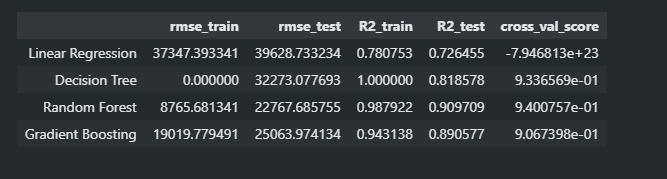

This time we have got little high accuracy let's try to acheive 95 % acuracy

In [55]:
old_df.groupby('MSZoning').SalePrice.mean().sort_values(ascending = False)

MSZoning
FV         193922.366906
RL         186595.844759
RM         152753.903720
RH         150062.846154
C (all)    132783.200000
Name: SalePrice, dtype: float64

Let's try to rank them base on their mean price and check the accuracy

In [57]:
old_df['MSZoning'] = old_df['MSZoning'].map({
    'FV' : 5,
    'RL'  : 4,
    'RM'  : 3,
    'RH'  : 2,
    'C (all)': 1
})

old_df['MSZoning'].value_counts()

MSZoning
4    2261
3     457
5     139
2      26
1      25
Name: count, dtype: int64

In [60]:
test_df = df.drop(f.find_columns(df, ['MSZoning']), axis = 1)
test_df['MSZoning'] = old_df['MSZoning']
evaluate_models(test_df, models)

(2908, 166)


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37412.591407,39567.200948,0.779987,0.727304,-3.910225e+23
Decision Tree,0.000000,33447.086944,1.000000,0.805139,9.399968e-01
Random Forest,8709.191322,22594.619080,0.988077,0.911076,9.406368e-01
Gradient Boosting,19098.196140,24853.168844,0.942668,0.892410,9.074937e-01


This increased accuracy little bit as of now am coding.